In [138]:
num_top = 20

In [139]:
# load csv files mdm_hiearchy3, mdm_hierarchy4, mdm_hiearchy5.csv
# and create a correlation matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import heapq

corr3_s_list_Frostbite = []
corr4_s_list_Frostbite = []
corr5_s_list_Frostbite = []
corr3_s_list_Frostbite_p = []
corr4_s_list_Frostbite_p = []
corr5_s_list_Frostbite_p = []
for i in [0]:
        # load csv files

    df3 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Frostbite_hierarchy_use\MDM_hierarchy3_25.csv")
    df4 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Frostbite_hierarchy_use\MDM_hierarchy4_25.csv")
    df5 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Frostbite_hierarchy_use\MDM_hierarchy5_25.csv")

    # load reward csv file
    df_reward = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Frostbite\MDM_reward_25.csv")

    df_merge = reduce(lambda x,y: pd.merge(x,y, on='Step', how='outer'), [df_reward, df3, df4, df5])
    
    df_new_hierarchy = df_merge[df_merge.columns[10:]].fillna(method='ffill')
    df_new_hierarchy.fillna(method='bfill', inplace = True)
    df_new_reward = df_merge[df_merge.columns[1:10]].fillna(method='bfill')
    df_new_reward.fillna(method='ffill', inplace = True)
    
    # get data for each data
    hu3 = [df_new_hierarchy['MDM_Frostbite_25_1 - hierarchy_use/hierarchy_selected_3'], 
           df_new_hierarchy['MDM_Frostbite_25_2 - hierarchy_use/hierarchy_selected_3'], 
           df_new_hierarchy['MDM_Frostbite_25_3 - hierarchy_use/hierarchy_selected_3']]

    hu4 = [df_new_hierarchy['MDM_Frostbite_25_1 - hierarchy_use/hierarchy_selected_4'], 
           df_new_hierarchy['MDM_Frostbite_25_2 - hierarchy_use/hierarchy_selected_4'], 
           df_new_hierarchy['MDM_Frostbite_25_3 - hierarchy_use/hierarchy_selected_4']]

    hu5 = [df_new_hierarchy['MDM_Frostbite_25_1 - hierarchy_use/hierarchy_selected_5'], 
           df_new_hierarchy['MDM_Frostbite_25_2 - hierarchy_use/hierarchy_selected_5'], 
           df_new_hierarchy['MDM_Frostbite_25_3 - hierarchy_use/hierarchy_selected_5']]

    # get reward data
    rw = [df_new_reward['MDM_Frostbite_25_1 - training/episode/reward'], 
          df_new_reward['MDM_Frostbite_25_2 - training/episode/reward'], 
          df_new_reward['MDM_Frostbite_25_3 - training/episode/reward']]

    # get index that df3['Step'] is closest to 50M
    idx = (np.abs(df3['Step'] - 10000000000)).idxmin()
    hu3_c = np.array([hu3[i][:]]).flatten()
    hu4_c = np.array([hu4[i][:]]).flatten()
    hu5_c = np.array([hu5[i][:]]).flatten()
    rw_c = np.array([rw[i][:]]).flatten()
    
    index = heapq.nlargest(num_top, enumerate(rw[i]), key=lambda x: x[1])
    index = pd.DataFrame(index)
    idx = list(index[0])

    # correlation between hu3_c and rw_c, hu4_c and rw_c, hu5_c and rw_c
    # use scipy to find correlation
    from scipy.stats import pearsonr, spearmanr
    # first find index that both hu3_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr1 = pearsonr(hu3_c[idx], rw_c[idx])
    corr3_s = spearmanr(hu3_c[idx], rw_c[idx])

    # find index that both hu4_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr2 = pearsonr(hu4_c[idx], rw_c[idx])
    corr4_s = spearmanr(hu4_c[idx], rw_c[idx])

    # find index that both hu5_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr3 = pearsonr(hu5_c[idx], rw_c[idx])
    corr5_s = spearmanr(hu5_c[idx], rw_c[idx])
    
    corr3_s_list_Frostbite.append(corr3_s[0])
    corr4_s_list_Frostbite.append(corr4_s[0])
    corr5_s_list_Frostbite.append(corr5_s[0])
    corr3_s_list_Frostbite_p.append(corr3_s[1])
    corr4_s_list_Frostbite_p.append(corr4_s[1])
    corr5_s_list_Frostbite_p.append(corr5_s[1])
    

    print(corr3_s[0], corr3_s[1])
    print(corr4_s[0], corr4_s[1])
    print(corr5_s[0], corr5_s[1])
    print("--------------------")

-0.38993062788036276 0.08921061655860783
0.007588198418071916 0.9746709131191154
0.5662742561926873 0.00924322840585468
--------------------


In [140]:
# load csv files mdm_hiearchy3, mdm_hierarchy4, mdm_hiearchy5.csv
# and create a correlation matrix

num_top = 20

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

corr3_s_list_Kangaroo = []
corr4_s_list_Kangaroo = []
corr5_s_list_Kangaroo = []
corr3_s_list_Kangaroo_p = []
corr4_s_list_Kangaroo_p = []
corr5_s_list_Kangaroo_p = []
for i in [2]:
        # load csv files
    df3 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Kangaroo_hierarchy_use\MDM_hierarchy3_25.csv")
    df4 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Kangaroo_hierarchy_use\MDM_hierarchy4_25.csv")
    df5 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Kangaroo_hierarchy_use\MDM_hierarchy5_25.csv")

    # load reward csv file
    df_reward = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Kangaroo\MDM_reward_25.csv")

    df_merge = reduce(lambda x,y: pd.merge(x,y, on='Step', how='outer'), [df_reward, df3, df4, df5])
    
    df_new_hierarchy = df_merge[df_merge.columns[10:]].fillna(method='ffill')
    df_new_hierarchy.fillna(method='bfill', inplace = True)
    df_new_reward = df_merge[df_merge.columns[1:10]].fillna(method='bfill')
    df_new_reward.fillna(method='ffill', inplace = True)
    
    # get data for each data
    hu3 = [df_new_hierarchy['MDM_Kangaroo_25_1 - hierarchy_use/hierarchy_selected_3'], 
           df_new_hierarchy['MDM_Kangaroo_25_2 - hierarchy_use/hierarchy_selected_3'], 
           df_new_hierarchy['MDM_Kangaroo_25_3 - hierarchy_use/hierarchy_selected_3']]

    hu4 = [df_new_hierarchy['MDM_Kangaroo_25_1 - hierarchy_use/hierarchy_selected_4'], 
           df_new_hierarchy['MDM_Kangaroo_25_2 - hierarchy_use/hierarchy_selected_4'], 
           df_new_hierarchy['MDM_Kangaroo_25_3 - hierarchy_use/hierarchy_selected_4']]

    hu5 = [df_new_hierarchy['MDM_Kangaroo_25_1 - hierarchy_use/hierarchy_selected_5'], 
           df_new_hierarchy['MDM_Kangaroo_25_2 - hierarchy_use/hierarchy_selected_5'], 
           df_new_hierarchy['MDM_Kangaroo_25_3 - hierarchy_use/hierarchy_selected_5']]

    # get reward data
    rw = [df_new_reward['MDM_Kangaroo_25_1 - training/episode/reward'], 
          df_new_reward['MDM_Kangaroo_25_2 - training/episode/reward'], 
          df_new_reward['MDM_Kangaroo_25_3 - training/episode/reward']]

# get index that df3['Step'] is closest to 50M
    idx = (np.abs(df3['Step'] - 10000000000)).idxmin()
    hu3_c = np.array([hu3[i][:]]).flatten()
    hu4_c = np.array([hu4[i][:]]).flatten()
    hu5_c = np.array([hu5[i][:]]).flatten()
    rw_c = np.array([rw[i][:]]).flatten()
    
    index = heapq.nlargest(num_top, enumerate(rw[i]), key=lambda x: x[1])
    index = pd.DataFrame(index)
    idx = list(index[0])

    # correlation between hu3_c and rw_c, hu4_c and rw_c, hu5_c and rw_c
    # use scipy to find correlation
    from scipy.stats import pearsonr, spearmanr
    # first find index that both hu3_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr1 = pearsonr(hu3_c[idx], rw_c[idx])
    corr3_s = spearmanr(hu3_c[idx], rw_c[idx])

    # find index that both hu4_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr2 = pearsonr(hu4_c[idx], rw_c[idx])
    corr4_s = spearmanr(hu4_c[idx], rw_c[idx])

    # find index that both hu5_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr3 = pearsonr(hu5_c[idx], rw_c[idx])
    corr5_s = spearmanr(hu5_c[idx], rw_c[idx])
    
    corr3_s_list_Kangaroo.append(corr3_s[0])
    corr4_s_list_Kangaroo.append(corr4_s[0])
    corr5_s_list_Kangaroo.append(corr5_s[0])
    corr3_s_list_Kangaroo_p.append(corr3_s[1])
    corr4_s_list_Kangaroo_p.append(corr4_s[1])
    corr5_s_list_Kangaroo_p.append(corr5_s[1])
print(corr3_s[0], corr3_s[1])
print(corr4_s[0], corr4_s[1])
print(corr5_s[0], corr5_s[1])
print("--------------------")

In [142]:
# load csv files mdm_hiearchy3, mdm_hierarchy4, mdm_hiearchy5.csv
# and create a correlation matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

corr3_s_list_Gravitar = []
corr4_s_list_Gravitar = []
corr5_s_list_Gravitar = []
corr3_s_list_Gravitar_p = []
corr4_s_list_Gravitar_p = []
corr5_s_list_Gravitar_p = []
for i in [0]:
        # load csv files
    df3 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Gravitar_hierarchy_use\MDM_hierarchy3_25.csv")
    df4 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Gravitar_hierarchy_use\MDM_hierarchy4_25.csv")
    df5 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Gravitar_hierarchy_use\MDM_hierarchy5_25.csv")

    # load reward csv file
    df_reward = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Gravitar\MDM_reward_25.csv")

    df_merge = reduce(lambda x,y: pd.merge(x,y, on='Step', how='outer'), [df_reward, df3, df4, df5])

    df_new_hierarchy = df_merge[df_merge.columns[10:]].fillna(method='ffill')
    df_new_hierarchy.fillna(method='bfill', inplace = True)
    df_new_reward = df_merge[df_merge.columns[1:10]].fillna(method='bfill')
    df_new_reward.fillna(method='ffill', inplace = True)
    
    # get data for each data
    hu3 = [df_new_hierarchy['MDM_Gravitar_25_1 - hierarchy_use/hierarchy_selected_3'], 
           df_new_hierarchy['MDM_Gravitar_25_2 - hierarchy_use/hierarchy_selected_3'], 
           df_new_hierarchy['MDM_Gravitar_25_3 - hierarchy_use/hierarchy_selected_3']]

    hu4 = [df_new_hierarchy['MDM_Gravitar_25_1 - hierarchy_use/hierarchy_selected_4'], 
           df_new_hierarchy['MDM_Gravitar_25_2 - hierarchy_use/hierarchy_selected_4'], 
           df_new_hierarchy['MDM_Gravitar_25_3 - hierarchy_use/hierarchy_selected_4']]

    hu5 = [df_new_hierarchy['MDM_Gravitar_25_1 - hierarchy_use/hierarchy_selected_5'], 
           df_new_hierarchy['MDM_Gravitar_25_2 - hierarchy_use/hierarchy_selected_5'], 
           df_new_hierarchy['MDM_Gravitar_25_3 - hierarchy_use/hierarchy_selected_5']]

    # get reward data
    rw = [df_new_reward['MDM_Gravitar_25_1 - training/episode/reward'], 
          df_new_reward['MDM_Gravitar_25_2 - training/episode/reward'], 
          df_new_reward['MDM_Gravitar_25_3 - training/episode/reward']]

# get index that df3['Step'] is closest to 50M
    idx = (np.abs(df3['Step'] - 10000000000)).idxmin()
    hu3_c = np.array([hu3[i][:]]).flatten()
    hu4_c = np.array([hu4[i][:]]).flatten()
    hu5_c = np.array([hu5[i][:]]).flatten()
    rw_c = np.array([rw[i][:]]).flatten()
    
    index = heapq.nlargest(num_top, enumerate(rw[i]), key=lambda x: x[1])
    index = pd.DataFrame(index)
    idx = list(index[0])

    # correlation between hu3_c and rw_c, hu4_c and rw_c, hu5_c and rw_c
    # use scipy to find correlation
    from scipy.stats import pearsonr, spearmanr
    # first find index that both hu3_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr1 = pearsonr(hu3_c[idx], rw_c[idx])
    corr3_s = spearmanr(hu3_c[idx], rw_c[idx])

    # find index that both hu4_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr2 = pearsonr(hu4_c[idx], rw_c[idx])
    corr4_s = spearmanr(hu4_c[idx], rw_c[idx])

    # find index that both hu5_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr3 = pearsonr(hu5_c[idx], rw_c[idx])
    corr5_s = spearmanr(hu5_c[idx], rw_c[idx])
    
    corr3_s_list_Gravitar.append(corr3_s[0])
    corr4_s_list_Gravitar.append(corr4_s[0])
    corr5_s_list_Gravitar.append(corr5_s[0])
    corr3_s_list_Gravitar_p.append(corr3_s[1])
    corr4_s_list_Gravitar_p.append(corr4_s[1])
    corr5_s_list_Gravitar_p.append(corr5_s[1])

    print(corr3_s[0], corr3_s[1])
    print(corr4_s[0], corr4_s[1])
    print(corr5_s[0], corr5_s[1])
    print("--------------------")

0.07639748605475433 0.7488706591590292
0.6292898578483843 0.002951084690621318
0.02348880878058814 0.9216985438906132
--------------------


In [143]:
# load csv files mdm_hiearchy3, mdm_hierarchy4, mdm_hiearchy5.csv
# and create a correlation matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

corr3_s_list_Qbert = []
corr4_s_list_Qbert = []
corr5_s_list_Qbert = []
corr3_s_list_Qbert_p = []
corr4_s_list_Qbert_p = []
corr5_s_list_Qbert_p = []
for i in [2]:
        # load csv files
    df3 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Qbert_hierarchy_use\MDM_hierarchy3_80.csv")
    df4 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Qbert_hierarchy_use\MDM_hierarchy4_80.csv")
    df5 = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Qbert_hierarchy_use\MDM_hierarchy5_80.csv")

    # load reward csv file
    df_reward = pd.read_csv(r"C:\Users\user\Downloads\MDM\data\Qbert\MDM_reward_80.csv")

    df_merge = reduce(lambda x,y: pd.merge(x,y, on='Step', how='outer'), [df_reward, df3, df4, df5])
    
    df_new_hierarchy = df_merge[df_merge.columns[10:]].fillna(method='ffill')
    df_new_hierarchy.fillna(method='bfill', inplace = True)
    df_new_reward = df_merge[df_merge.columns[1:10]].fillna(method='bfill')
    df_new_reward.fillna(method='ffill', inplace = True)
    
    # get data for each data
    hu3 = [df_new_hierarchy['MDM_Qbert_80_runseed=1 - hierarchy_use/hierarchy_selected_3'], 
           df_new_hierarchy['MDM_Qbert_80_runseed=0 - hierarchy_use/hierarchy_selected_3'], 
           df_new_hierarchy['MDM_Qbert_80 - hierarchy_use/hierarchy_selected_3']]

    hu4 = [df_new_hierarchy['MDM_Qbert_80_runseed=1 - hierarchy_use/hierarchy_selected_4'], 
           df_new_hierarchy['MDM_Qbert_80_runseed=0 - hierarchy_use/hierarchy_selected_4'], 
           df_new_hierarchy['MDM_Qbert_80 - hierarchy_use/hierarchy_selected_4']]

    hu5 = [df_new_hierarchy['MDM_Qbert_80_runseed=1 - hierarchy_use/hierarchy_selected_5'], 
           df_new_hierarchy['MDM_Qbert_80_runseed=0 - hierarchy_use/hierarchy_selected_5'], 
           df_new_hierarchy['MDM_Qbert_80 - hierarchy_use/hierarchy_selected_5']]

    # get reward data
    rw = [df_new_reward['MDM_Qbert_80_runseed=1 - training/episode/reward'], 
          df_new_reward['MDM_Qbert_80_runseed=0 - training/episode/reward'], 
          df_new_reward['MDM_Qbert_80 - training/episode/reward']]

# get index that df3['Step'] is closest to 50M
    idx = (np.abs(df3['Step'] - 10000000000)).idxmin()
    hu3_c = np.array([hu3[i][:]]).flatten()
    hu4_c = np.array([hu4[i][:]]).flatten()
    hu5_c = np.array([hu5[i][:]]).flatten()
    rw_c = np.array([rw[i][:]]).flatten()
    
    index = heapq.nlargest(num_top, enumerate(rw[i]), key=lambda x: x[1])
    index = pd.DataFrame(index)
    idx = list(index[0])

    # correlation between hu3_c and rw_c, hu4_c and rw_c, hu5_c and rw_c
    # use scipy to find correlation
    from scipy.stats import pearsonr, spearmanr
    # first find index that both hu3_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr1 = pearsonr(hu3_c[idx], rw_c[idx])
    corr3_s = spearmanr(hu3_c[idx], rw_c[idx])

    # find index that both hu4_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr2 = pearsonr(hu4_c[idx], rw_c[idx])
    corr4_s = spearmanr(hu4_c[idx], rw_c[idx])

    # find index that both hu5_c and rw_c are not nan
    idx1 = np.argwhere(~np.isnan(hu3_c)).squeeze()
    idx2 = np.intersect1d(idx, idx1)
    corr3 = pearsonr(hu5_c[idx], rw_c[idx])
    corr5_s = spearmanr(hu5_c[idx], rw_c[idx])
    
    corr3_s_list_Qbert.append(corr3_s[0])
    corr4_s_list_Qbert.append(corr4_s[0])
    corr5_s_list_Qbert.append(corr5_s[0])
    corr3_s_list_Qbert_p.append(corr3_s[1])
    corr4_s_list_Qbert_p.append(corr4_s[1])
    corr5_s_list_Qbert_p.append(corr5_s[1])

    print(corr3_s[0], corr3_s[1])
    print(corr4_s[0], corr4_s[1])
    print(corr5_s[0], corr5_s[1])
    print("--------------------")

0.18372505125784194 0.4381188601081455
0.14695299404829362 0.5364114020724343
-0.18372505125784194 0.4381188601081455
--------------------


In [167]:
Qbert = pd.DataFrame([np.mean(np.abs(corr5_s_list_Qbert)), np.mean(np.abs(corr4_s_list_Qbert)),np.mean(np.abs(corr3_s_list_Qbert))])
Frostbite = pd.DataFrame([np.mean(np.abs(corr5_s_list_Frostbite)), np.mean(np.abs(corr4_s_list_Frostbite)),np.mean(np.abs(corr3_s_list_Frostbite))])
Kangaroo = pd.DataFrame([np.mean(np.abs(corr5_s_list_Kangaroo)), np.mean(np.abs(corr4_s_list_Kangaroo)),np.mean(np.abs(corr3_s_list_Kangaroo))])
Gravitar = pd.DataFrame([np.mean(np.abs(corr5_s_list_Gravitar)), np.mean(np.abs(corr4_s_list_Gravitar)),np.mean(np.abs(corr3_s_list_Gravitar))])

In [168]:
Qbert_p = pd.DataFrame([np.mean(np.abs(corr5_s_list_Qbert_p)), np.mean(np.abs(corr4_s_list_Qbert_p)),np.mean(np.abs(corr3_s_list_Qbert_p))])
Frostbite_p = pd.DataFrame([np.mean(np.abs(corr5_s_list_Frostbite_p)), np.mean(np.abs(corr4_s_list_Frostbite_p)),np.mean(np.abs(corr3_s_list_Frostbite_p))])
Kangaroo_p = pd.DataFrame([np.mean(np.abs(corr5_s_list_Kangaroo_p)), np.mean(np.abs(corr4_s_list_Kangaroo_p)),np.mean(np.abs(corr3_s_list_Kangaroo_p))])
Gravitar_p = pd.DataFrame([np.mean(np.abs(corr5_s_list_Gravitar_p)), np.mean(np.abs(corr4_s_list_Gravitar_p)),np.mean(np.abs(corr3_s_list_Gravitar_p))])

In [169]:
data_table = pd.concat([Frostbite, Gravitar, Qbert, Kangaroo],axis=1)
data_table.columns = ['Frostbite', 'Gravitar', 'Qbert', 'Kangaroo']
data_table.index = ['Hierarchy5','Hierarchy4','Hierarchy3']
data_table = data_table.round(3)
data_table

,Frostbite,Gravitar,Qbert,Kangaroo
Hierarchy5,0.566,0.023,0.184,0.443
Hierarchy4,0.008,0.629,0.147,0.176
Hierarchy3,0.390,0.076,0.184,0.370


In [180]:
df = pd.concat([Frostbite_p, Gravitar_p, Qbert_p, Kangaroo_p],axis=1)
df.columns = ['Frostbite', 'Gravitar', 'Qbert', 'Kangaroo']
df.index = ['Hierarchy5','Hierarchy4','Hierarchy3']
df = df.round(3)
df = df.astype(str)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        df[df.columns[j]][df.index[i]] = '(p = ' + df[df.columns[j]][df.index[i]] + ')' 
df = np.array(df)
#df = df.astype(float)

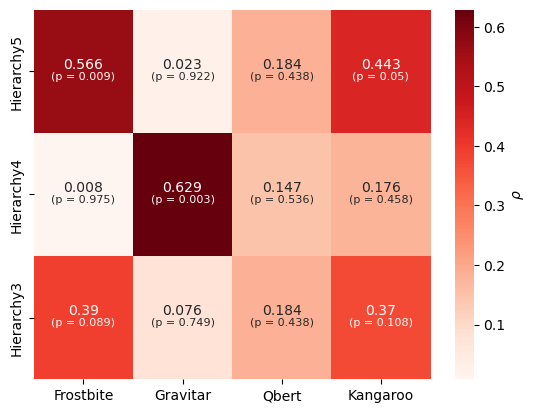

In [183]:
sns.heatmap(data_table, annot=df,cmap='Reds', cbar_kws={'label': r'$\rho$'}, 
            annot_kws={"size": 8,'ma': 'right','va':'top'}, fmt="",cbar=True)
sns.heatmap(data_table, annot=True,cmap='Reds', 
            annot_kws={"size": 10,'ma': 'right','va':'bottom'}, fmt="",cbar=False)


#sns.heatmap(data_table, annot=Y, annot_kws={'va':'bottom'}, fmt="", cbar=False)
#sns.heatmap(data_table, annot=Z, annot_kws={'va':'top'}, fmt="", cbar=False)

plt.title('', fontsize=5)
plt.show()

#df = pd.concat([Frostbite_p, Gravitar_p, Qbert_p, Kangaroo_p],axis=1)
#for i in range(df.shape[1]):
#    for j in range(df.shape[0]):
#        plt.text(i,j,round(df.iloc[j,i],1),ha='center',va='center')